In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Armazenando o dataframe em uma variavel
df = pd.read_csv('./dataset/agricultural.csv')

In [3]:
# Realizando a exploração dos dados
df.info
# Vendo se existem registros nulos no dataframe
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

##### Tratando os dados ausentes, incorretos e invalidos do dataframe

In [4]:
# Substituindo '%' , ',' e '-'
df = df.replace('%','', regex=True)
df = df.replace(',','', regex=True)
df = df.replace('-','', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90',np.nan)
# Descartando linhas com valores NaN
df = df.dropna()
# Checando se todos os valores NaN foram resolvidos
df.isnull().sum()
# Convertando os tipos de dados para float
lista = ['Coarse wool Price','Coarse wool price % Change','Copra Price','Copra price % Change','Cotton Price','Cotton price % Change','Fine wool Price','Fine wool price % Change','Hard log Price','Hard log price % Change','Hard sawnwood Price','Hard sawnwood price % Change','Hide Price','Hide price % change','Plywood Price','Plywood price % Change','Rubber Price','Rubber price % Change','Softlog Price','Softlog price % Change','Soft sawnwood Price','Soft sawnwood price % Change','Wood pulp Price','Wood pulp price % Change']
df[lista] = df[lista].astype(float)
df.dtypes


Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [5]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


##### Colunas de data e horacolunas
Formatando a coluna datetime e definindo-a como índice para o conjunto de dados

In [6]:
df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
# Colocando a coluna month como indice
df = df.set_index('Month')

In [7]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


##### Análise Exploratória e Visualização
Aqui são usadas as bibliotecas **matplotlib.pylot e a seaborra** para começar a realizar essas análises

In [8]:
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##### Mapa de Calor

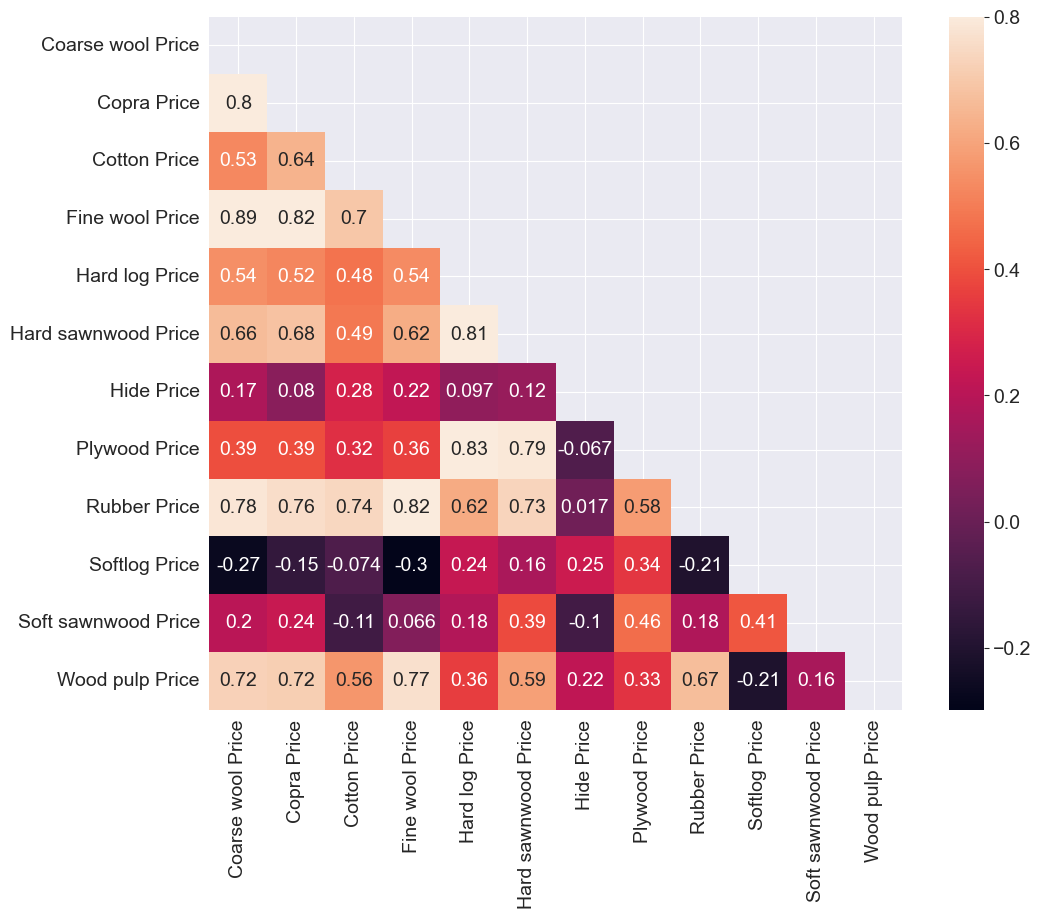

In [9]:
# Lista dos materiais
materials_data=['Coarse wool Price','Copra Price','Cotton Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Rubber Price','Softlog Price','Soft sawnwood Price','Wood pulp Price']
# obtendo a matriz de correlação (função corr)
corrmat = df[materials_data].corr()
# definindo o tamanho do gráfico
fig = plt.figure(figsize = (12,9))
# criando a parte superior do triângulo, uma vez que a matriz é simétrica (repetitiva)
mask = np.triu(np.ones_like(corrmat,dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square=True, annot= True)
plt.show()

O mapa de calor mostra a correlação entre as matérias-primas.</br>
Quanto maior o valor correlacionado maior chance de serem duas matérias-primas relacionadas.</br>
Valores positivos próximos a 1 (como 0.8 entre "Coarse wool Price" e "Copra Price") indicam uma forte correlação positiva. Ou seja, quando o preço de um produto aumenta, o preço do outro tende a aumentar também.</br>
Valores próximos de 0 (como -0.074 entre "Cotton Price" e "Softlog Price") indicam uma baixa correlação, ou seja, a variação de preço de um produto não tem relação com a do outro.</br>
Valores negativos (como -0.3 entre "Fine wool Price" e "Softlog Price") indicam correlação negativa, significando que quando o preço de um produto sobe, o do outro tende a cair.</br>

A intensidade da cor também reflete a força da correlação:</br>
Cores mais claras representam uma correlação mais forte, seja positiva ou negativa.</br>
Cores mais escuras indicam uma correlação mais fraca.</br>

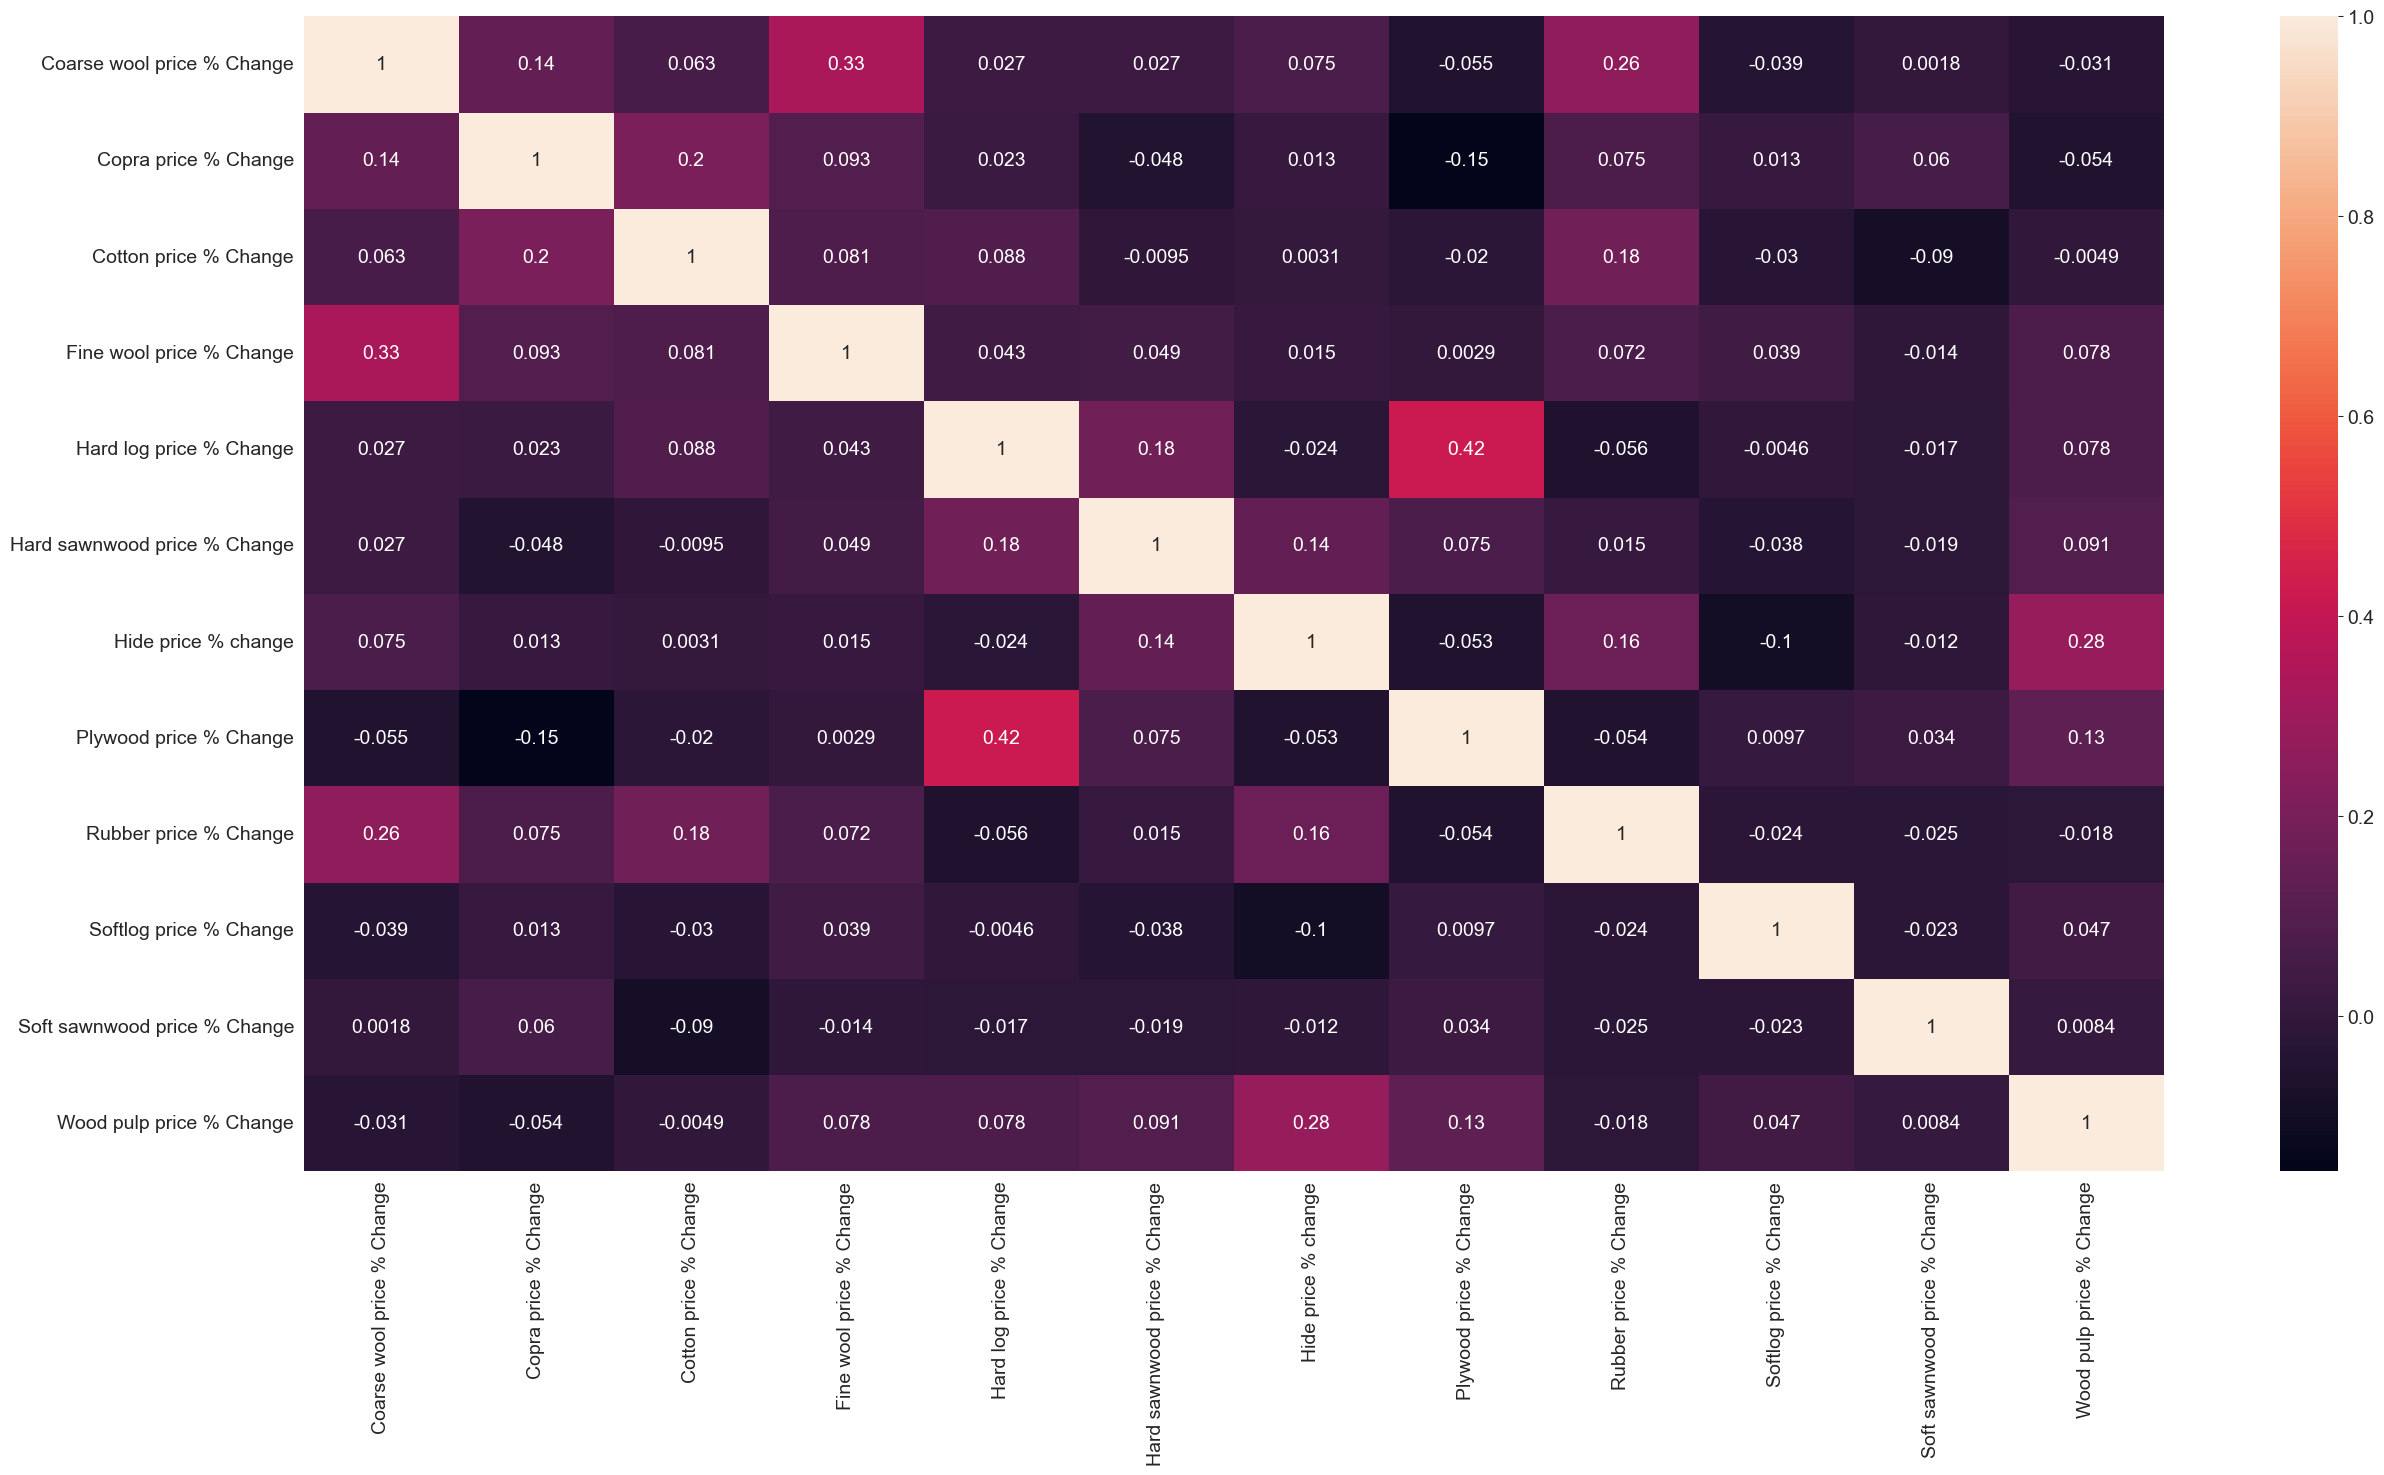

In [10]:
plt.figure(figsize=(30,15))
changelist = ['Coarse wool price % Change','Copra price % Change','Cotton price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Rubber price % Change','Softlog price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
# criando a matrix de correlação para todo o dataset
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

A partir desse gráfico é possivel dizer que quase não há relação entre a variação percentual dos preços das matérias-primas</br>
-O valor negativo implica que duas variaveis estão negativamente correlacionadas (um aumento, outro decréscimo)</br>
-Zero implica nenhuma relação</br>
-Caso contrário, maior o valor maior a chance de relação, preços e seus gráficos de % de mudança

#### Deep dive em um dos itens da lista 

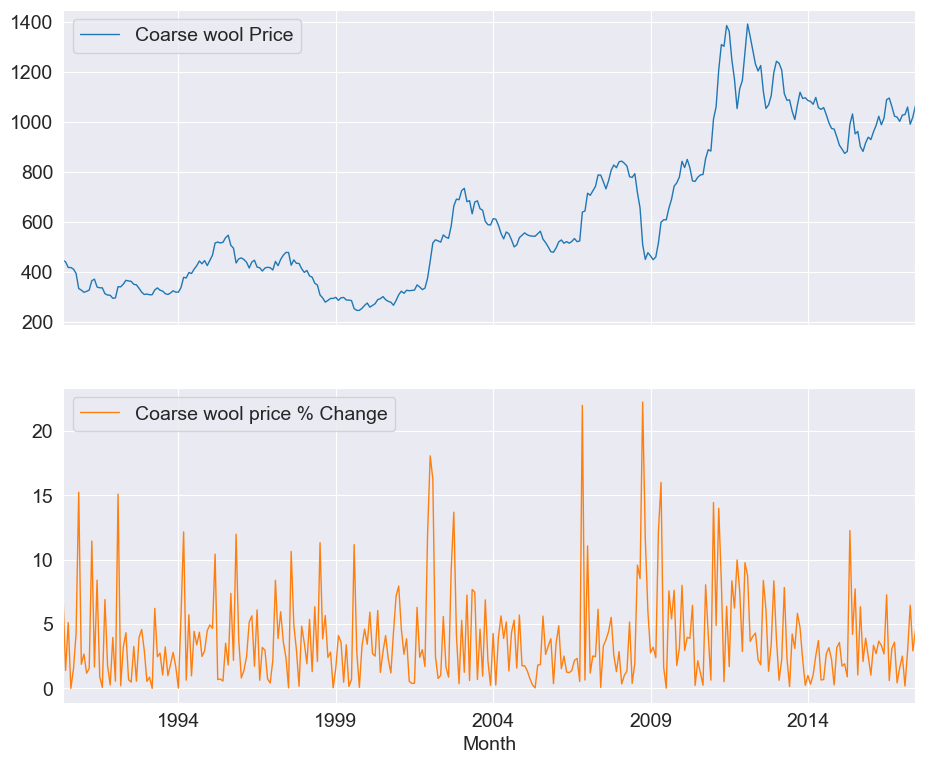

In [11]:
axes = df[['Coarse wool Price', 'Coarse wool price % Change']].plot(figsize=(11,9), subplots=True, linewidth=1)

## Algumas analises do dataframe

#### Variação normal do preço de cada matéria-prima

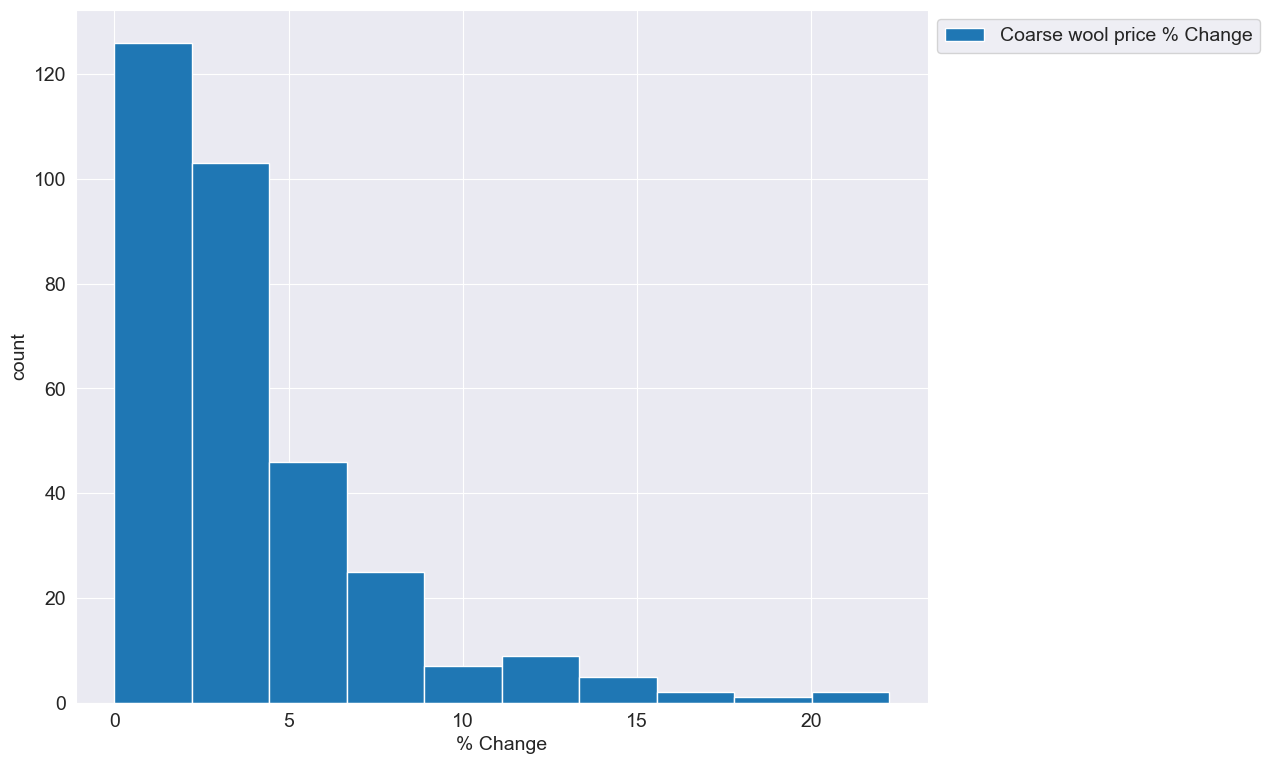

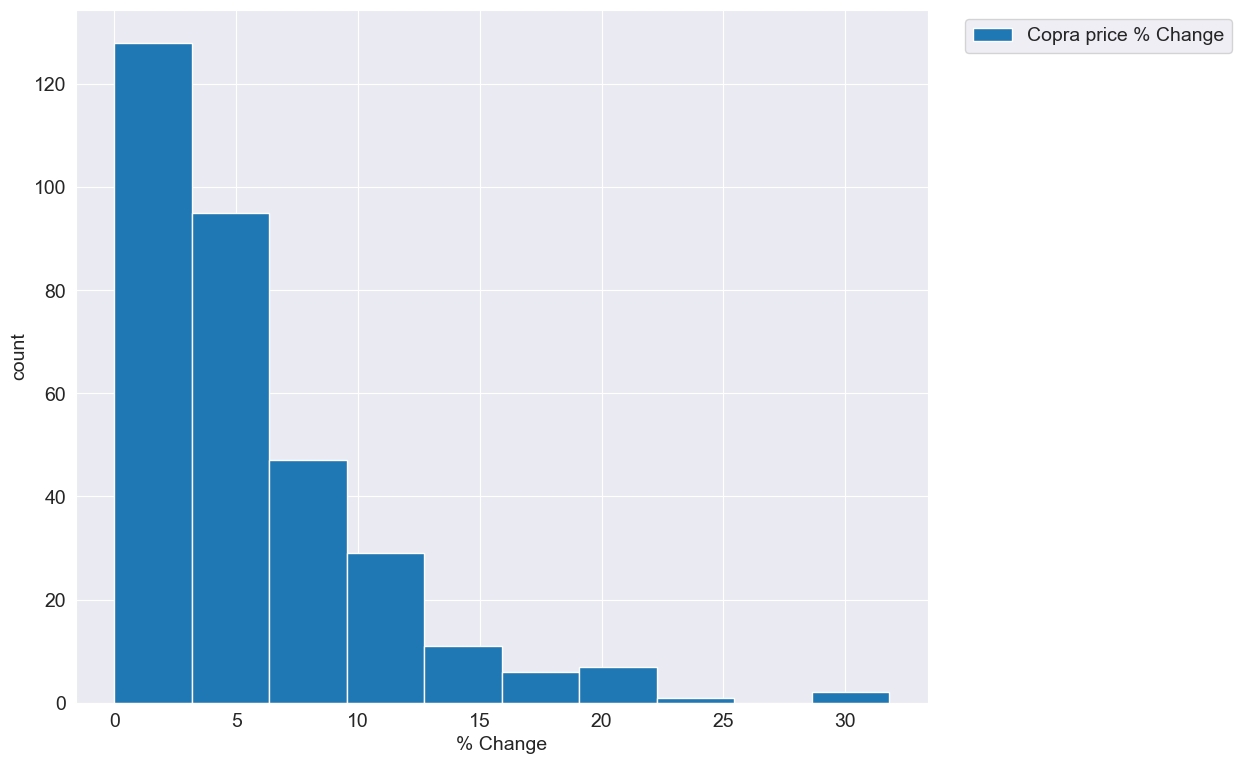

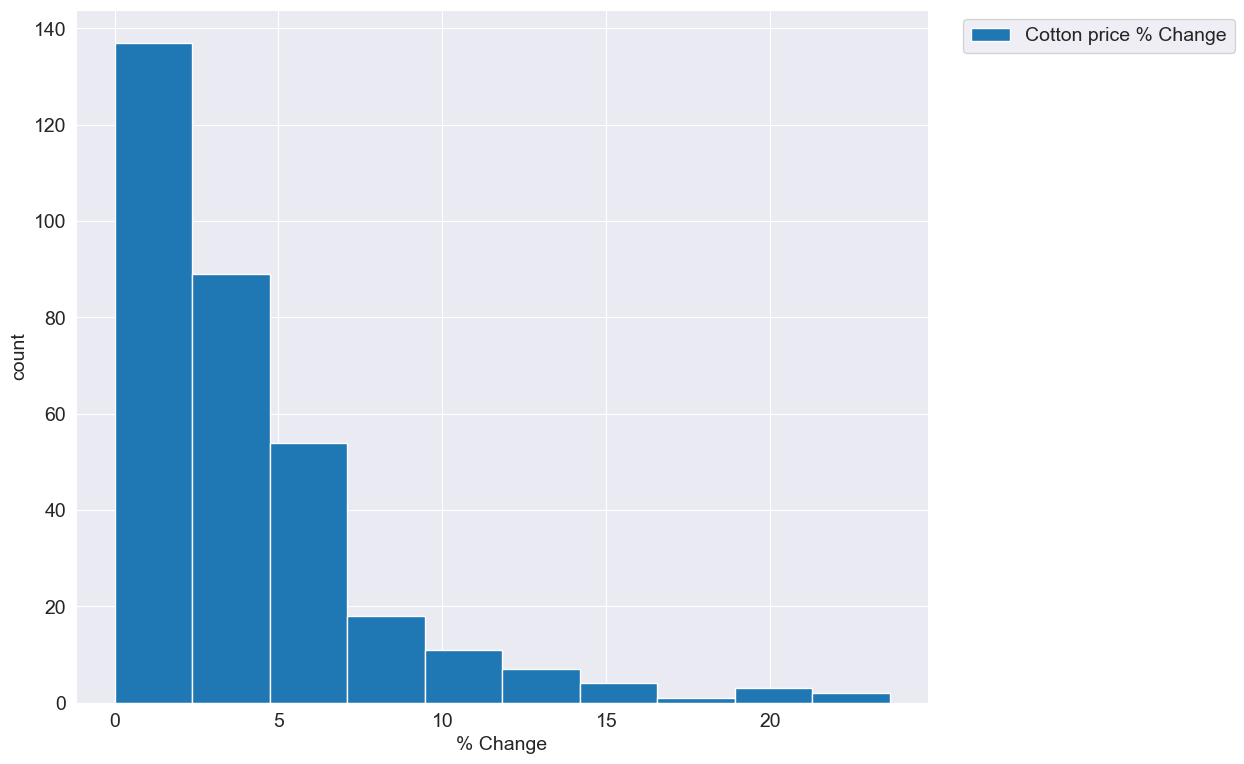

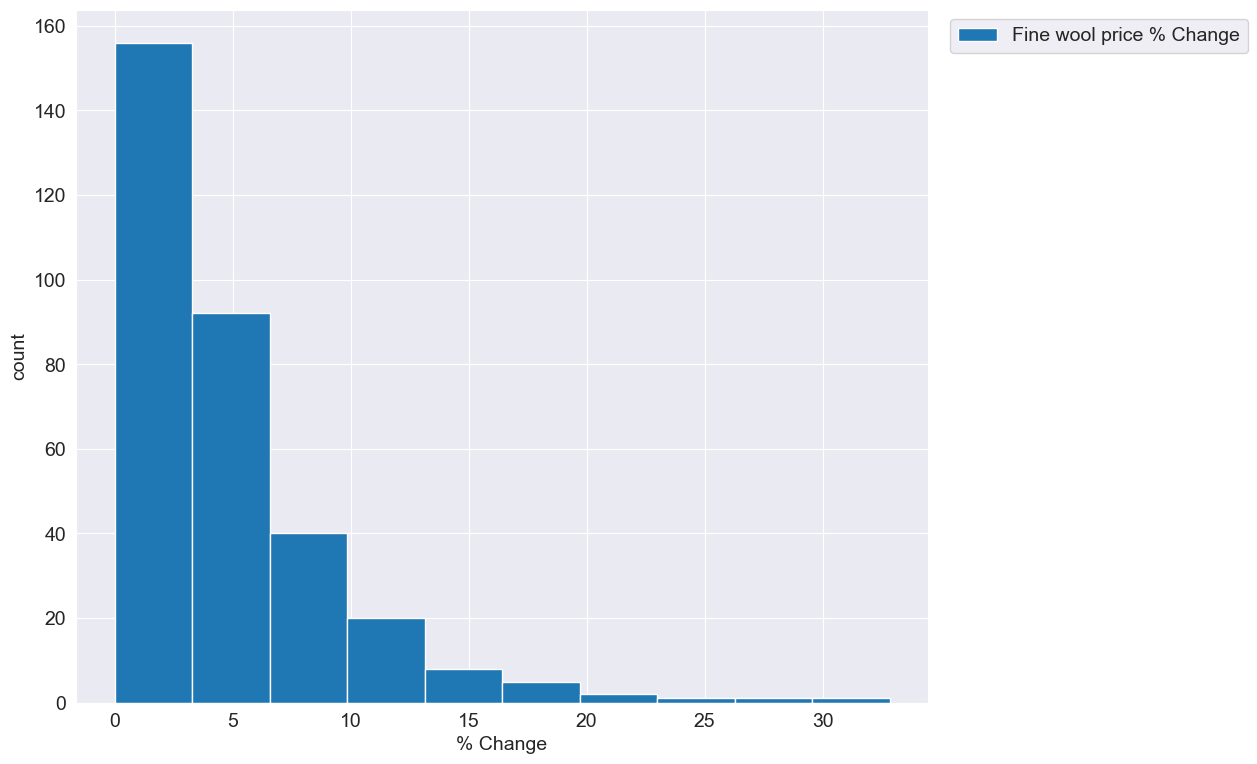

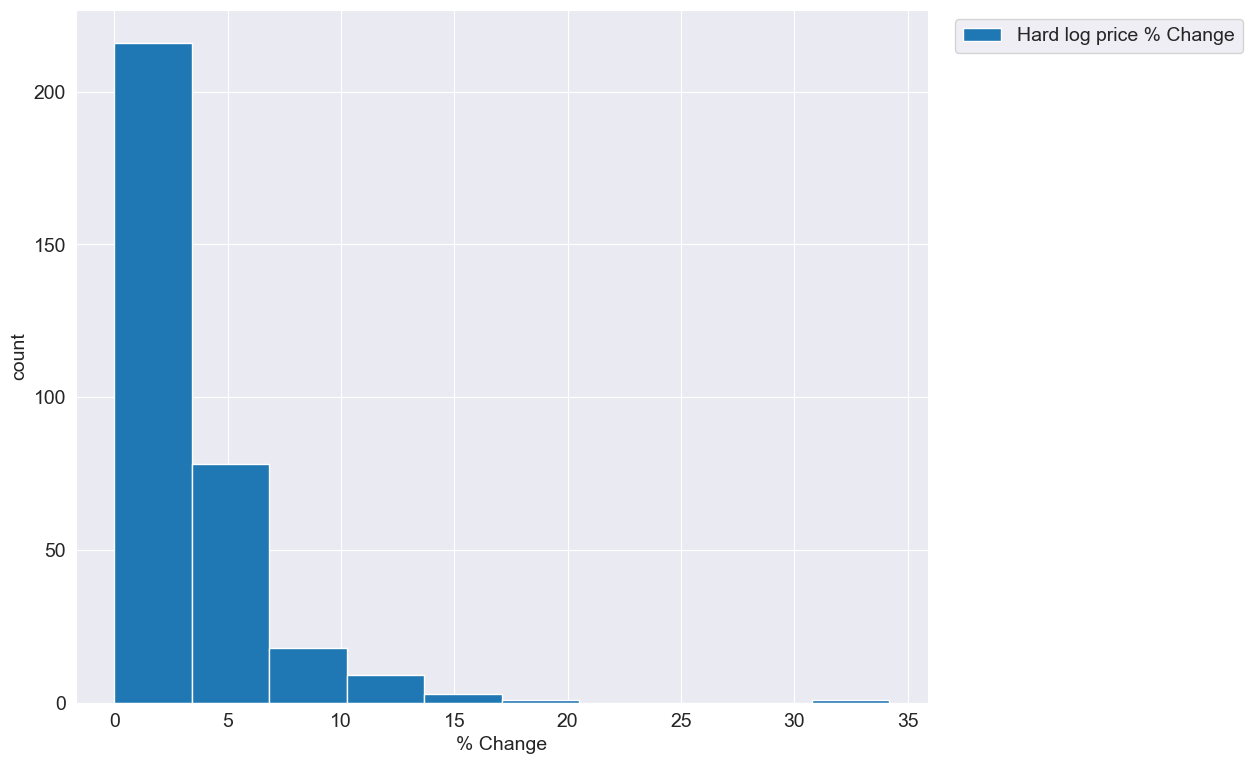

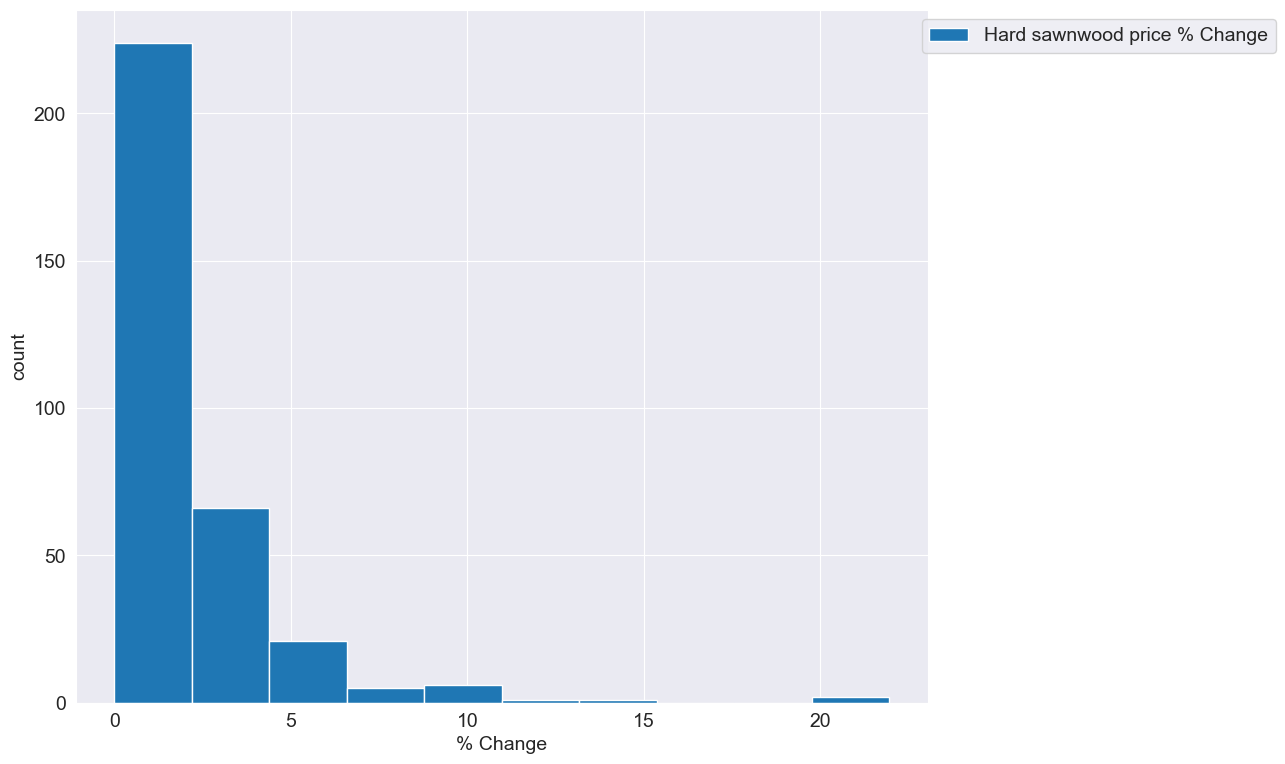

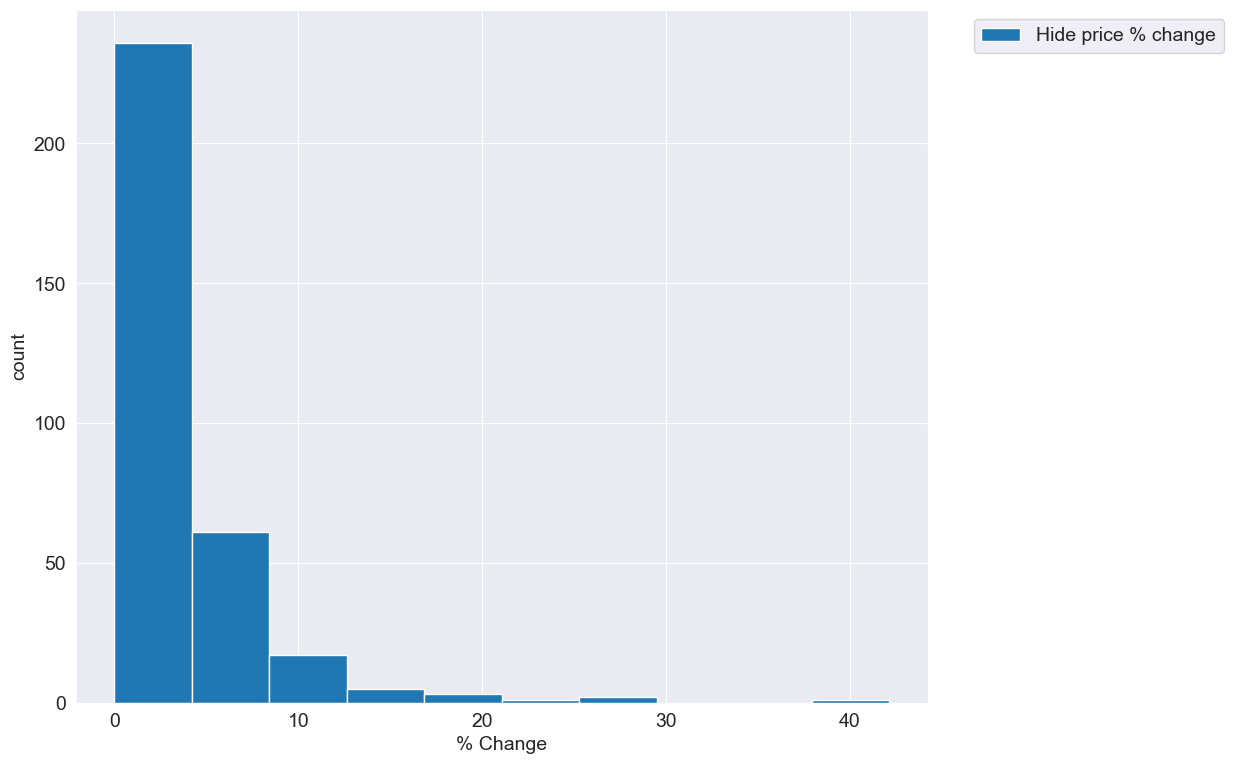

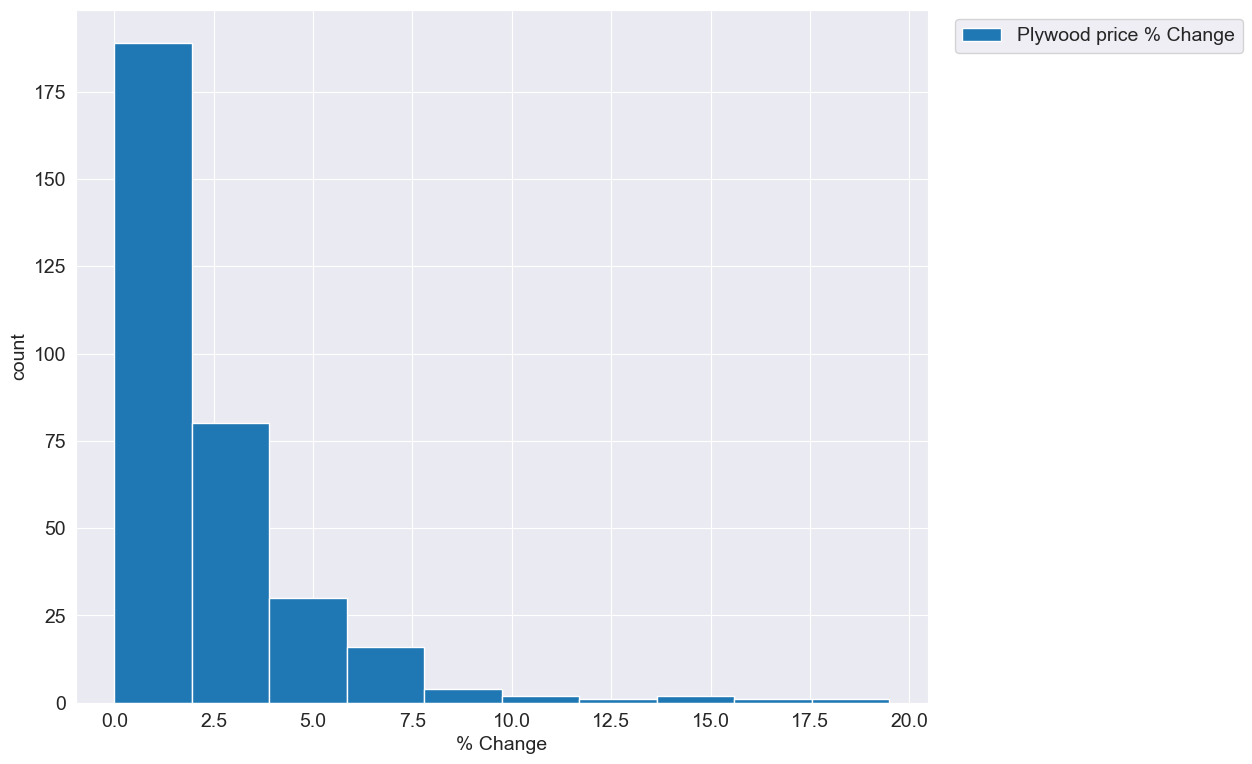

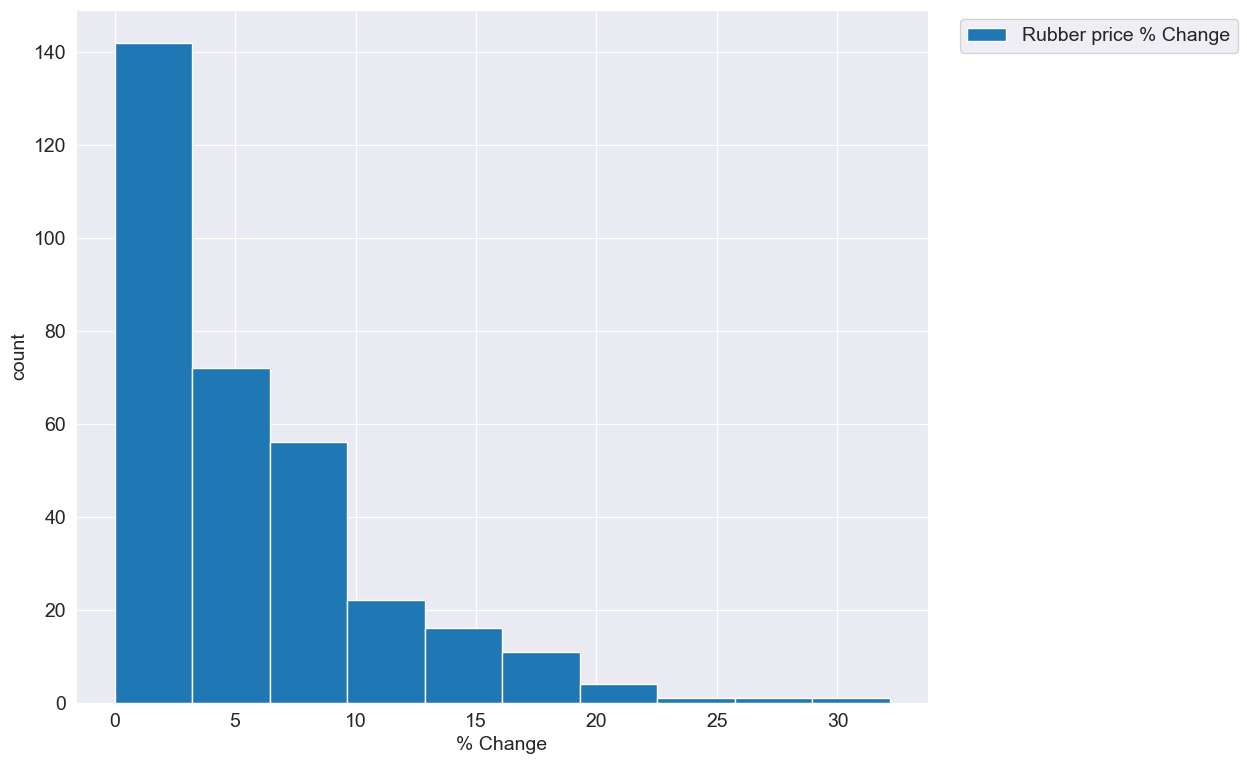

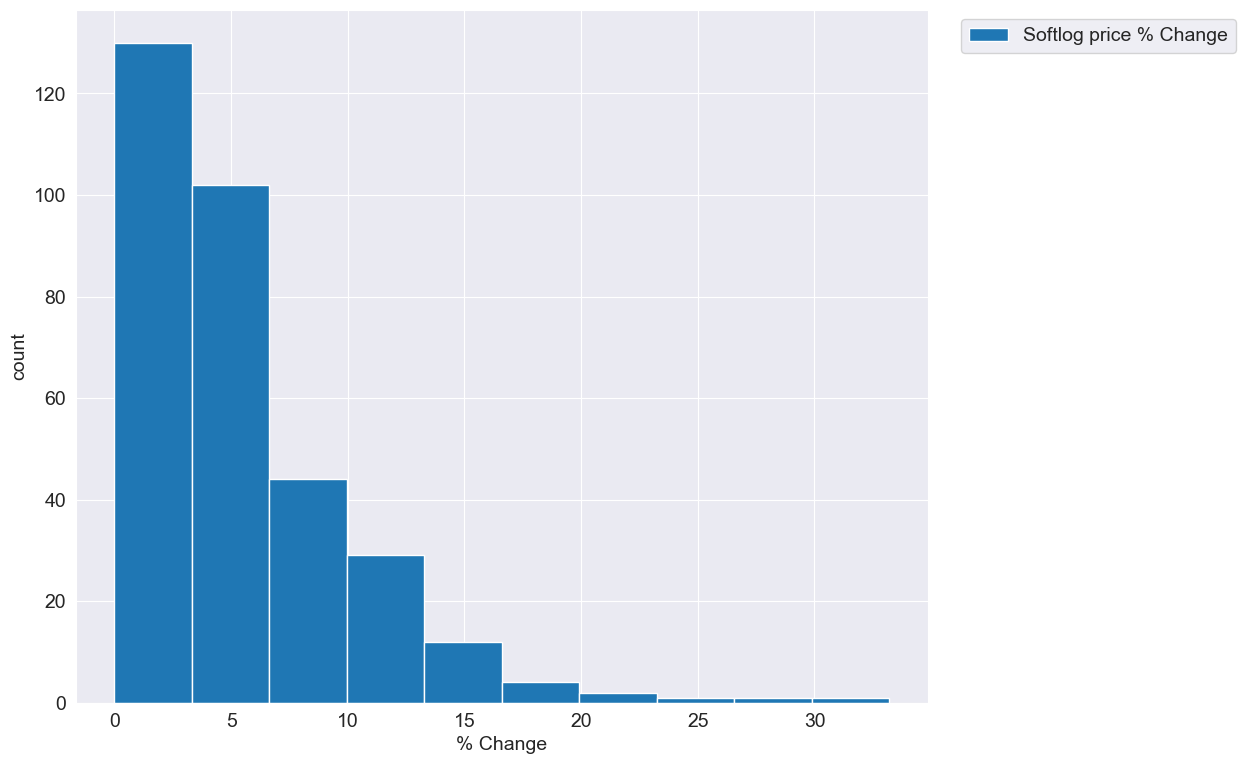

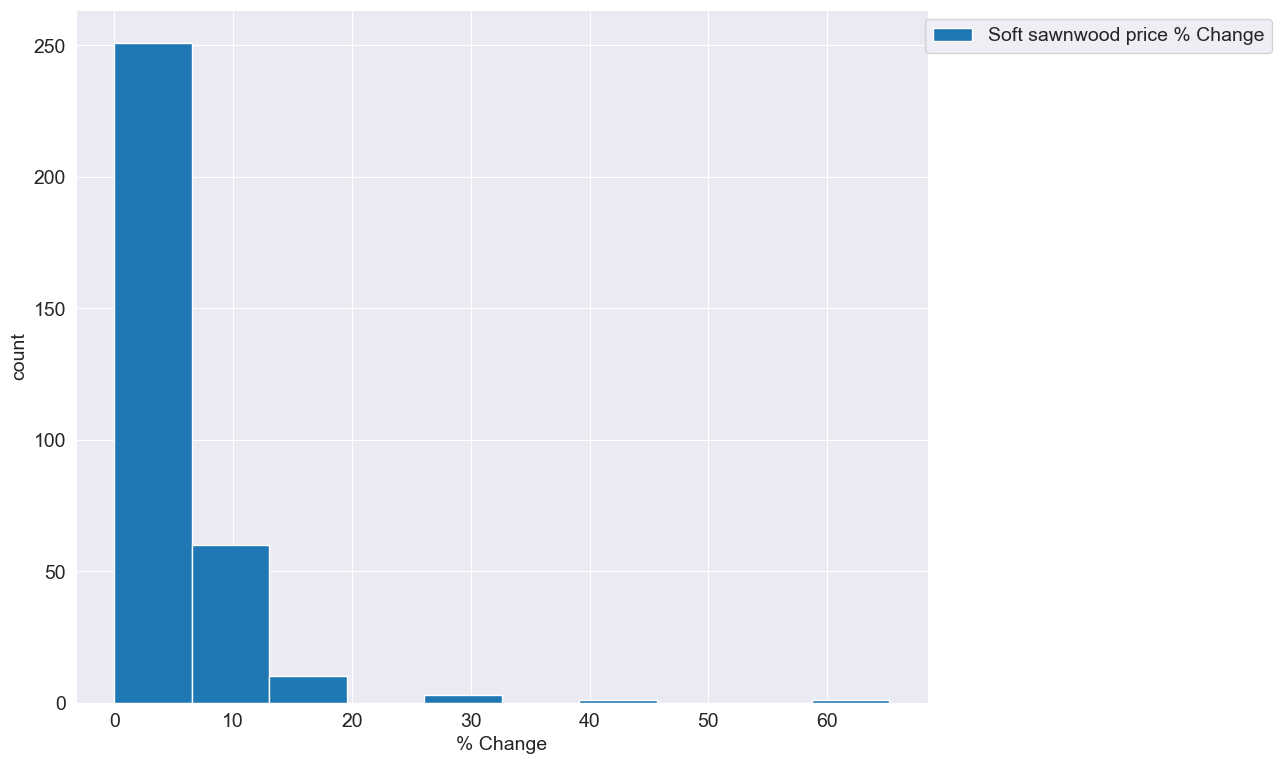

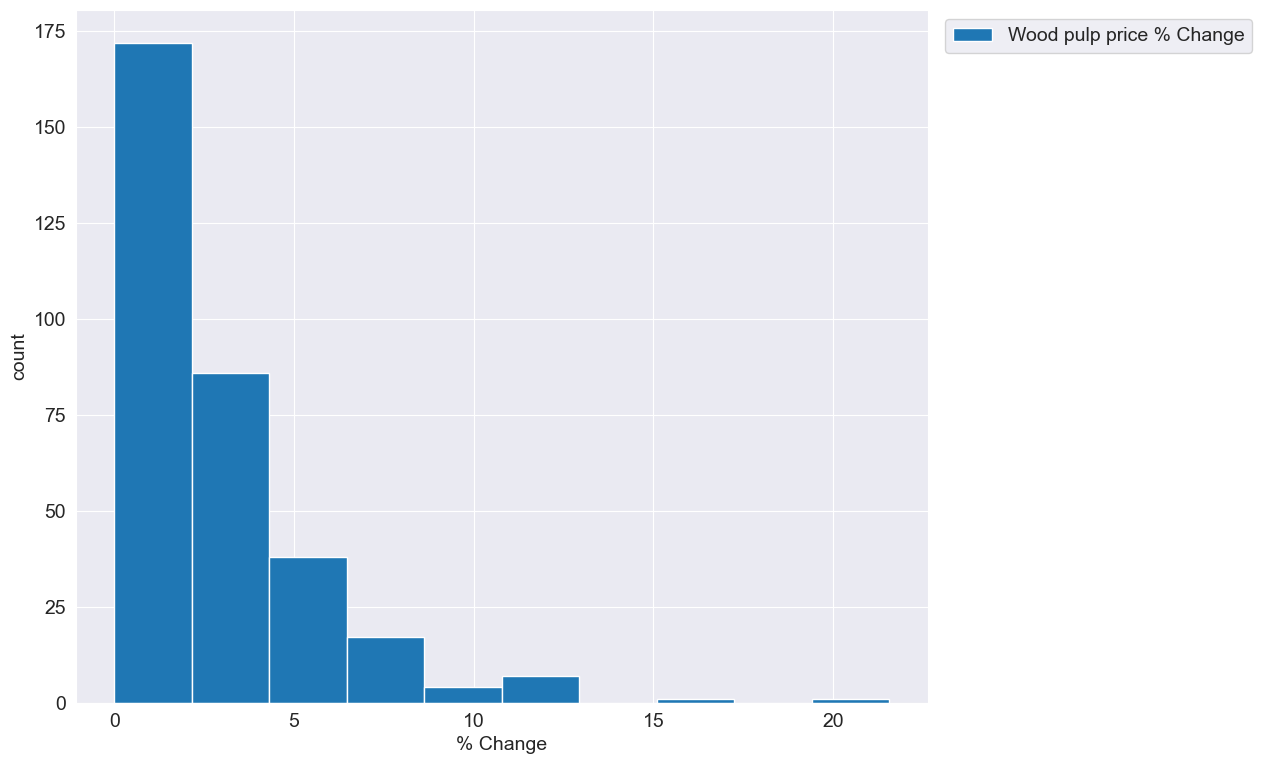

In [12]:
# Percorre todo o dataframe e cria um histograma de cada item
changelist = ['Coarse wool price % Change','Copra price % Change','Cotton price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Rubber price % Change','Softlog price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
for i in range(len(changelist)):
    plt.figure(figsize=(12,12))
    df[changelist[i]].hist(figsize=(11,9), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(changelist[i:],loc='upper center', bbox_to_anchor = (1.2,1))

São gerados histogramas que apresenta a distribuição de variação percentual dos preços dos itens

### Encontrar a matéria-prima que tem menor preço ao longo dos anos

Text(0.5, 0.98, 'Comparação de preço de Matéria-prima')

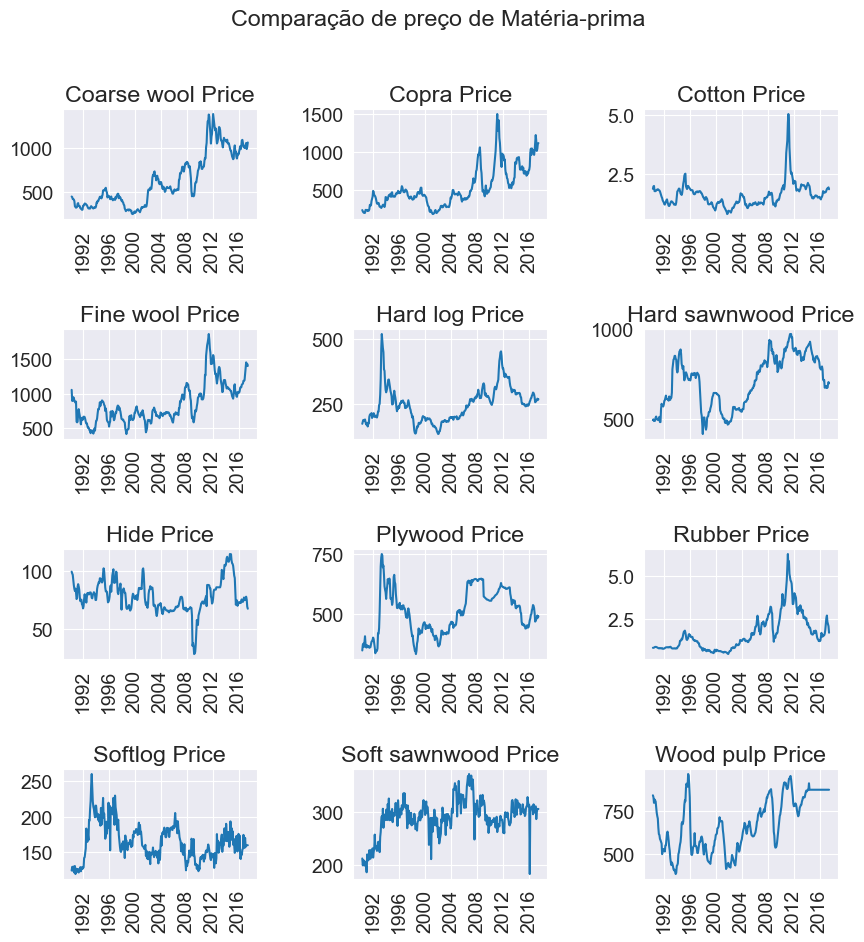

In [13]:
plt.figure(figsize=(10,10))
materialslist = ['Coarse wool Price','Copra Price','Cotton Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Rubber Price','Softlog Price','Soft sawnwood Price','Wood pulp Price']
for i in range(len(materialslist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    plt.title(materialslist[i])
    plt.plot(df[materialslist[i]])
    plt.xticks(rotation=90)
plt.suptitle('Comparação de preço de Matéria-prima')

Os gráficos acima mostram a variação de preço ao longo do tempo para cada item.</br>
É uma maneira de visualizar e comparar as tendências de preços de diferentes matérias-primas em um único layout.

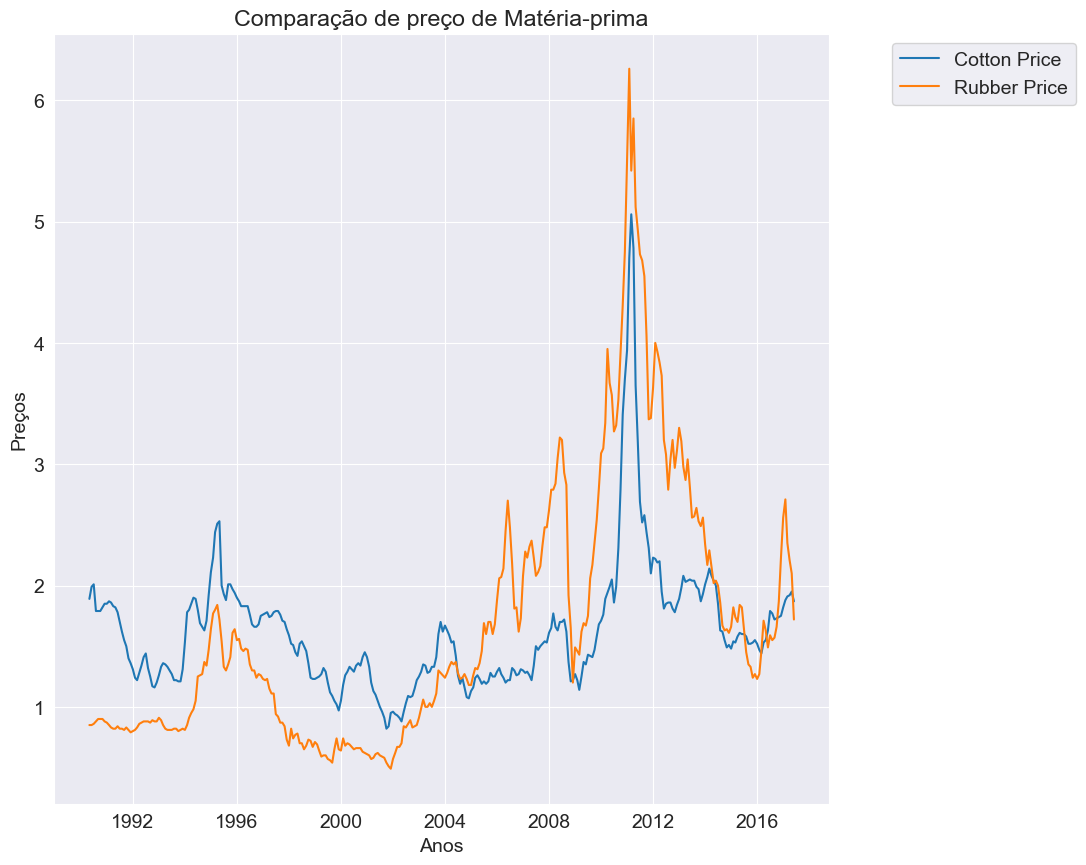

In [14]:
# Drill down de comparação em dois itens
plt.figure(figsize=(10,10))
plt.plot(df[['Cotton Price', 'Rubber Price']])
plt.title('Comparação de preço de Matéria-prima')
plt.xlabel('Anos')
plt.ylabel('Preços')
plt.legend(['Cotton Price','Rubber Price'], loc= 'upper center', bbox_to_anchor =(1.2,1))

No exemplo acima na comparação de materias-primas o algodão é possivel se observar:</br>
-A matéria-prima de menor preço dos ultimos anos</br>
-Tanto o algodão quanto a borracha são materiais de baixo preço

### Qual matéria-prima tem a maior e menor vsriação de % de preço

In [15]:
import random as random

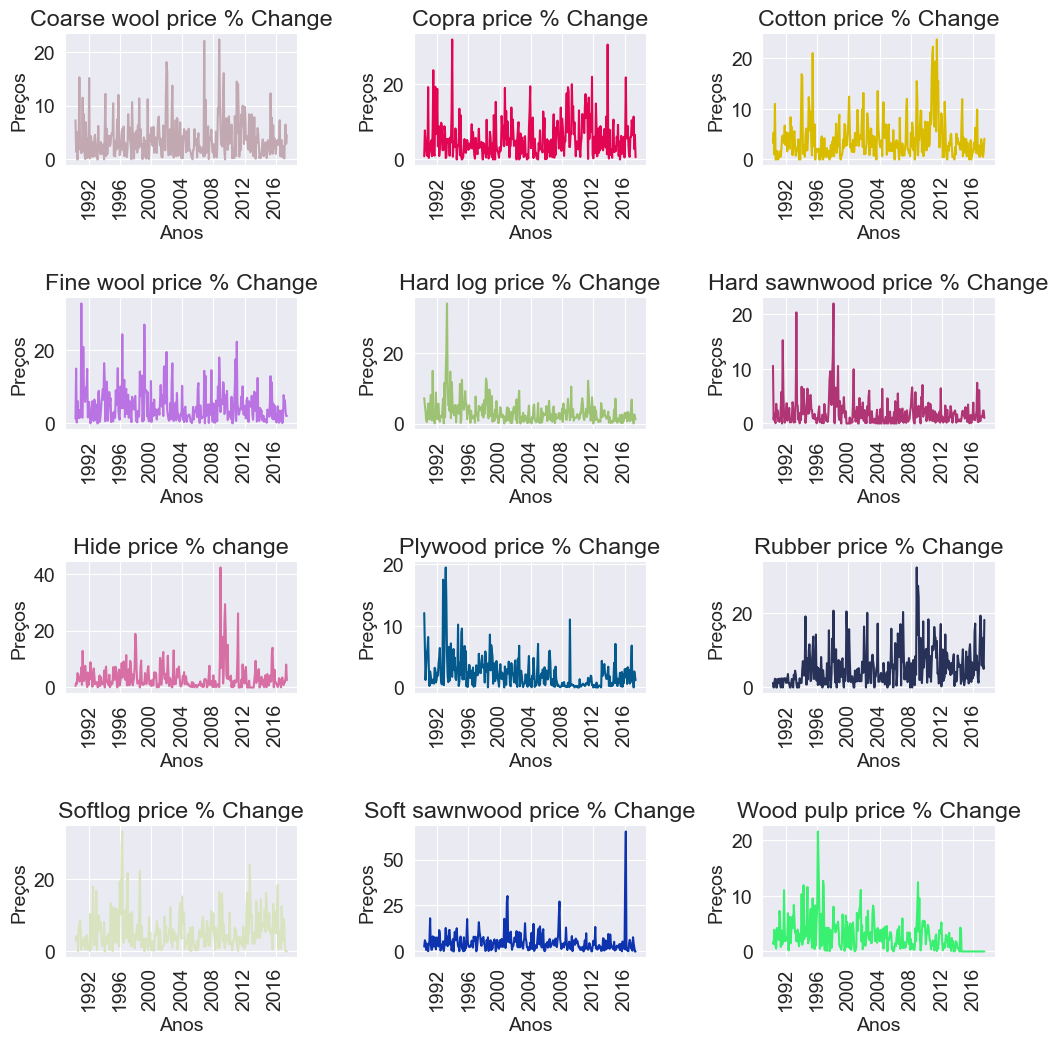

In [16]:
plt.figure(figsize=(12,12))
for i in range(len(changelist)):
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r,g,b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    plt.plot(df[changelist[i]], c = color)
    plt.xticks(rotation=90)
    plt.title(changelist[i])
    plt.xlabel('Anos')
    plt.ylabel('Preços')
   
   

Cada subgráfico mostra a evolução do preço de um material ao longo do tempo.</br> 
Cada linha é exibida em uma cor aleatória para diferenciar visualmente os gráficos. Isso facilita a comparação das tendências de preços de diferentes matérias-primas em uma única visualização</br>
No modelo é possivel observar a maior % de mudança em mais de 60 para madeira serrada macia e a menor % de mudança é para madeira compensada em menos de 20

### Encontrar as matérias primas com mudança drástica de preço

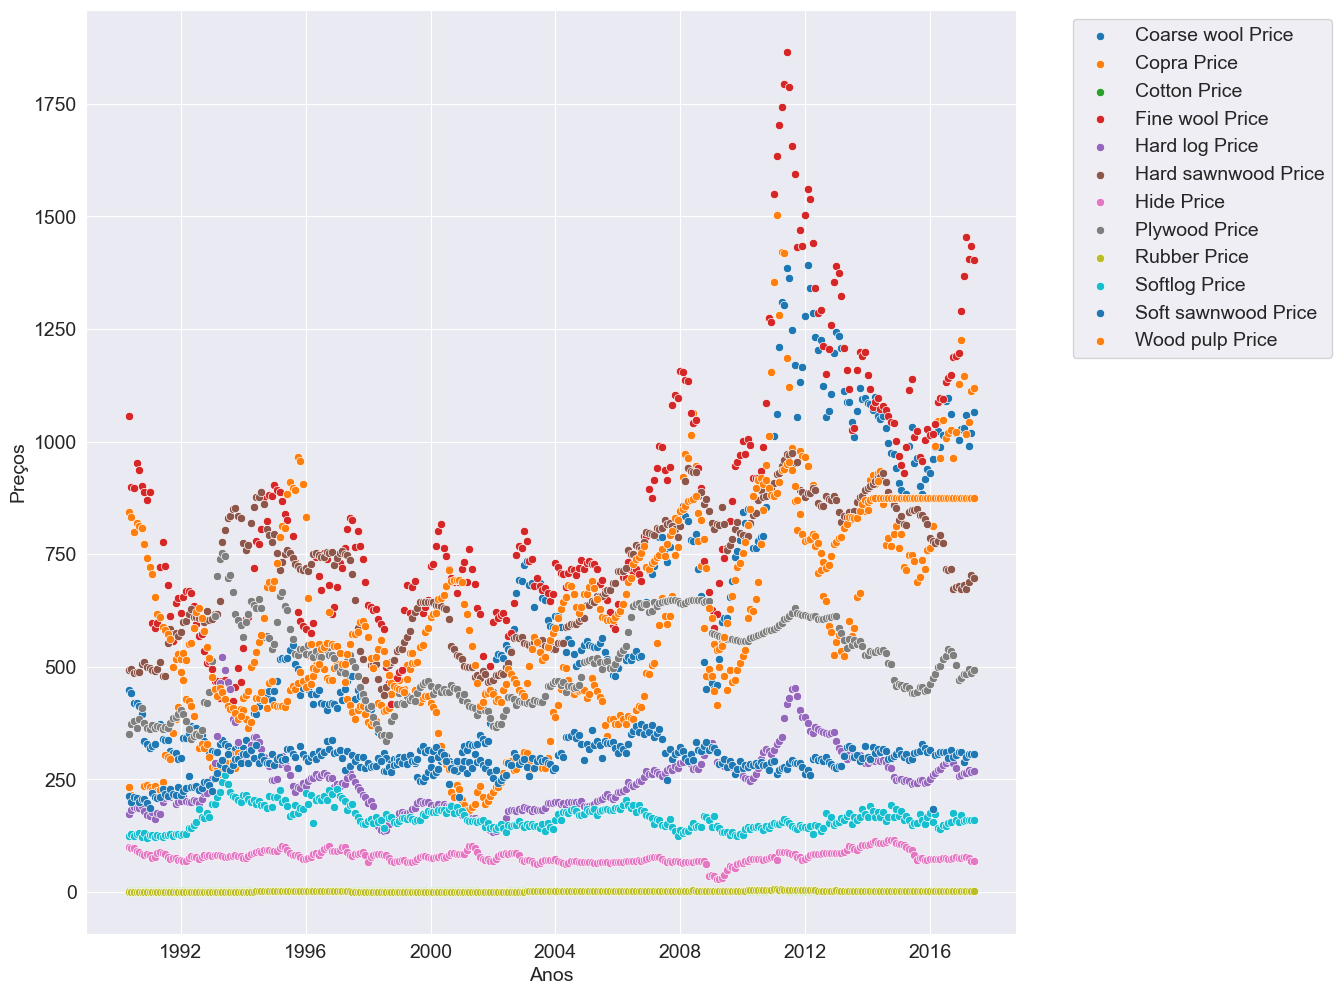

In [17]:
# Criando um gráfico de dispersão para analise
lowlist = ['Coarse wool Price','Copra Price','Cotton Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Rubber Price','Softlog Price','Soft sawnwood Price','Wood pulp Price']
plt.figure(figsize=(12,12))
plt.ylabel('Preços')
plt.xlabel('Anos')
for i in range(len(lowlist)):
    sns.scatterplot(y=df[lowlist[i]], x=df.index)
    plt.legend(lowlist,loc = 'upper center', bbox_to_anchor=(1.2,1))

Foi gerado um gráfico de dispersão para cada matéria-prima, todos sobrepostos no mesmo gráfico.</br>
O eixo Y representa os preços e o eixo X representa os anos. </br>
Por meio da legenda é possível identificar os diferentes materiais, para facilitar a distinção entre os pontos de dados de cada matéria-prima.</br>
Esse gráfico é útil para comparar visualmente as variações de preços ao longo do tempo entre diferentes materiais.

### Qual a faixa de preço de matérias primas de baixo preço

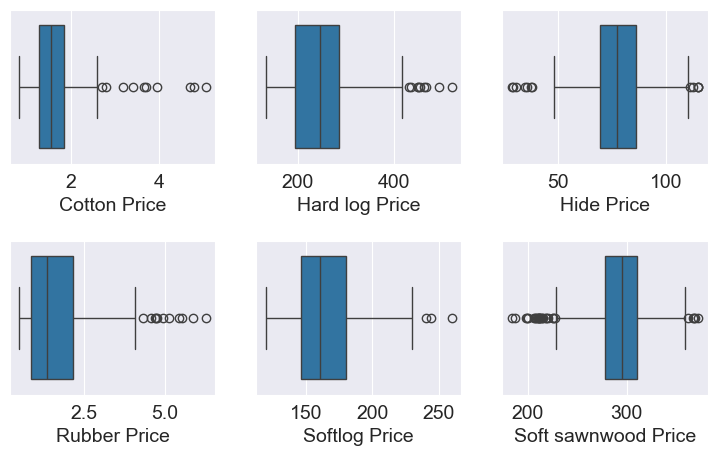

In [18]:
# Nesse modelo é usado gráficos de box plot para mostrar outliers( registros que fogem a mediana)
lowlist = ['Cotton Price','Hard log Price','Hide Price','Rubber Price','Softlog Price','Soft sawnwood Price']
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x=df[lowlist[i]])

Cria um boxplot para cada uma das variáveis, organizando os gráficos em uma grade de 2 x 3.</br>
Cada boxplot mostra a distribuição dos preços para um material específico, permitindo uma análise visual da mediana, quartis, e possíveis outliers em cada conjunto de dados.
Inclui: o Intervalo interquartil está entre o Q3 e Q1 minimo, primeiro quartil (Q1), mediana, terceiro quartil(Q3) e máximo outliers